In [1259]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

cars_raw = pd.read_csv("./Automobile_data.csv", sep=",", header=0, encoding='cp1250', engine='python')
cars_raw.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in cars_raw.columns]
cars_raw.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [1260]:
cars_raw = cars_raw.replace('?', np.NaN)
cars_raw.head(20)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [1261]:
missing_data = cars_raw.isnull()

In [1262]:
for column in missing_data.columns:
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized_losses
False    164
True      41
Name: normalized_losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel_type
False    205
Name: fuel_type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num_of_doors
False    203
True       2
Name: num_of_doors, dtype: int64

body_style
False    205
Name: body_style, dtype: int64

drive_wheels
False    205
Name: drive_wheels, dtype: int64

engine_location
False    205
Name: engine_location, dtype: int64

wheel_base
False    205
Name: wheel_base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb_weight
False    205
Name: curb_weight, dtype: int64

engine_type
False    205
Name: engine_type, dtype: int64

num_of_cylinders
False    205
Name: num_of_cylinders, dtype: int64

engine_size
False    205
Name: engine_size, dtype: int64

fuel_system
Fa

In [1263]:
# Calculate the average of the column
avg_norm_loss = cars_raw["normalized_losses"].astype("float").mean(axis=0)
print("Average of normalized_losses:", avg_norm_loss)
#Replace "NaN" by mean value in "normalized-losses" column
cars_raw["normalized_losses"].replace(np.nan, avg_norm_loss, inplace=True)

#Calculate the mean value for 'bore' column
avg_bore=cars_raw['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
#Replace NaN by mean value
cars_raw["bore"].replace(np.nan, avg_bore, inplace=True)

#Calculate the mean vaule for "stroke" column
avg_stroke = cars_raw["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)
#Replace "stroke" by mean value
cars_raw["stroke"].replace(np.nan, avg_stroke, inplace = True)

#Calculate the mean vaule for "peak-rpm" column
avg_peak_rpm = cars_raw["peak_rpm"].astype("float").mean(axis = 0)
print("Average of peak_rpm:", avg_peak_rpm)
#Replace "peak-rpm" by mean value
cars_raw["peak_rpm"].replace(np.nan, avg_peak_rpm, inplace = True)

#Calculate the mean vaule for "horsepower" column
avg_horsepower = cars_raw['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
#Replace "horsepower" by mean value
cars_raw['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average of normalized_losses: 122.0
Average of bore: 3.3297512437810957
Average of stroke: 3.2554228855721337
Average of peak_rpm: 5125.369458128079
Average horsepower: 104.25615763546799


In [1264]:
cars_raw['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [1265]:
cars_raw['num_of_doors'].value_counts().idxmax()

'four'

In [1266]:
#replace the missing 'num-of-doors' values by the most frequent
cars_raw["num_of_doors"].replace(np.nan, "four", inplace=True)

In [1267]:
# simply drop whole row with NaN in "price" column
cars_raw.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
cars_raw.reset_index(drop=True, inplace=True)
cars_raw.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [1268]:
cars_raw.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [1269]:
#Convert data types to proper format
cars_raw[["bore", "stroke","price","peak_rpm"]] = cars_raw[["bore", "stroke","price","peak_rpm"]].astype("float")
cars_raw[["normalized_losses"]] = cars_raw[["normalized_losses"]].astype("int")
cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [1270]:
#basic statistics for all features
cars_raw.describe(include = 'all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330692,3.256874,10.164279,NaN,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,NaN,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,NaN,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,NaN,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,NaN,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,NaN,5500.000000,30.000000,34.000000,16500.000000


Text(0.5, 0.98, 'Linear regression model')

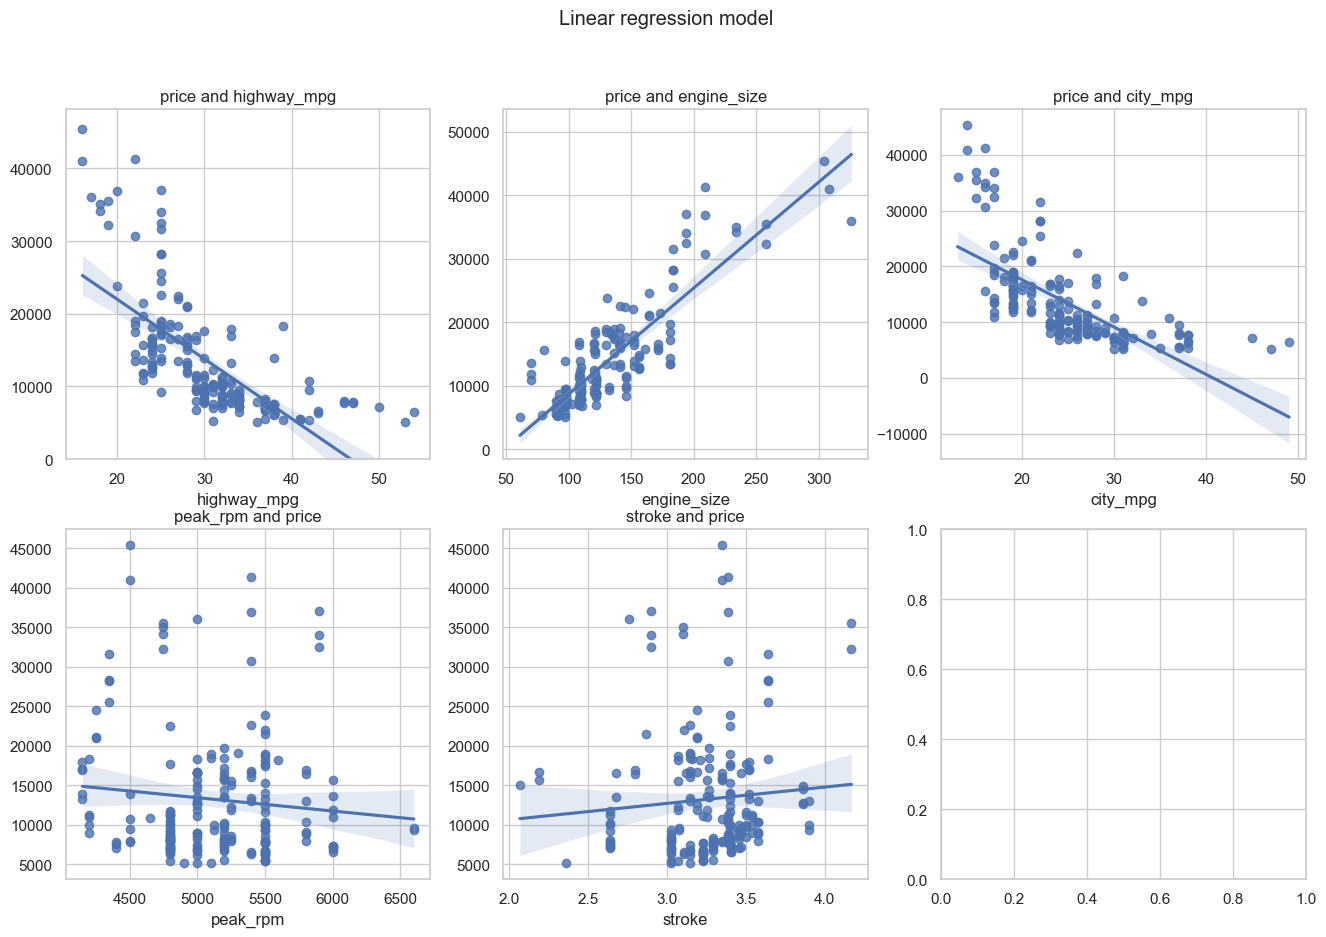

In [1271]:

sb.set(style="whitegrid")
fig, axes = plt.subplots(2,3, figsize=(16,10))
sb.regplot(x="highway_mpg", y="price", data=cars_raw, ax=axes[0,0]).set(ylim=(0))
sb.regplot(x="engine_size", y="price", data=cars_raw, ax=axes[0,1])
sb.regplot(x="city_mpg", y="price", data=cars_raw, ax=axes[0,2])
sb.regplot(x="peak_rpm", y="price", data=cars_raw, ax=axes[1,0])
sb.regplot(x="stroke", y="price", data=cars_raw, ax=axes[1,1])

axes[0,0].set(title="price and highway_mpg" , ylabel=None)
axes[0,1].set(title="price and engine_size" , ylabel=None)
axes[0,2].set(title="price and city_mpg", ylabel=None)
axes[1,0].set(title="peak_rpm and price", ylabel=None)
axes[1,1].set(title="stroke and price", ylabel=None)

title="Linear_regression_model"
fig.suptitle(title.replace("_", " "))

Text(0.5, 0.98, 'box-and-whisker plot model')

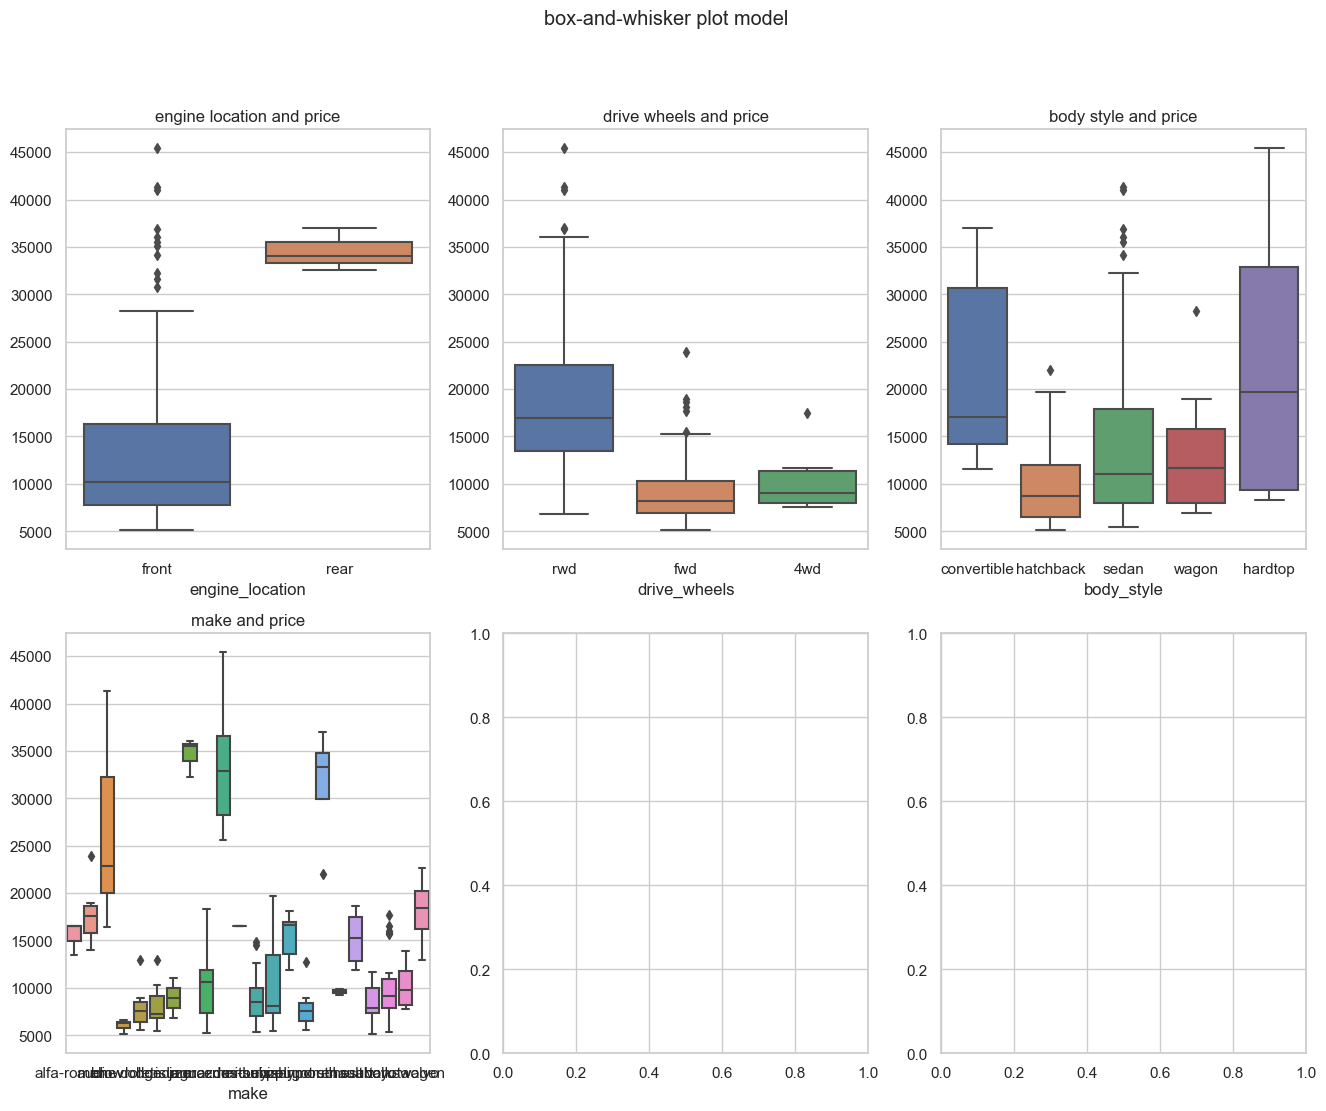

In [1272]:
fig, axes = plt.subplots(2,3, figsize=(16,12))
sb.boxplot(x="engine_location", y="price", data=cars_raw, ax=axes[0,0])
sb.boxplot(x="drive_wheels", y="price", data=cars_raw, ax=axes[0,1])
sb.boxplot(x="body_style", y="price", data=cars_raw, ax=axes[0,2])
sb.boxplot(x="make", y="price", data=cars_raw, ax=axes[1,0])

axes[0,0].set(title="engine location and price" , ylabel=None)
axes[0,1].set(title="drive wheels and price" , ylabel=None)
axes[0,2].set(title="body style and price", ylabel=None)
axes[1,0].set(title="make and price", ylabel=None)

title="box-and-whisker_plot_model"
fig.suptitle(title.replace("_", " "))

In [1273]:
#create dataframe with price-correlation scores for continuous features
price_corr_df = pd.DataFrame(columns=["attribute", "Pearson_corr", "p-value"])
for col in cars_raw:
    if col!='price' and (cars_raw[col].dtypes == np.int64 or cars_raw[col].dtypes == float):
        corr, p_value = stats.pearsonr(cars_raw[col], cars_raw['price'])
        #if p_value < 0.0001:
        new_row = pd.DataFrame({"attribute":col,"Pearson_corr":corr,"p-value":p_value}, index=[0])
        price_corr_df = pd.concat([new_row, price_corr_df.loc[:]]).reset_index(drop=True)
        print(col + " " + str(p_value))

price_corr_df.set_index("attribute", inplace=True)
price_corr_df.sort_values(by="Pearson_corr", ascending=False, key=lambda x: np.abs(x)).head(20)



symboling 0.24491487657165212
normalized_losses 0.05789749352703121
wheel_base 8.076488270732243e-20
length 8.016477466158188e-30
width 9.200335510479686e-38
height 0.055146273251013435
curb_weight 2.189577238893318e-53
engine_size 9.265491622197335e-64
bore 8.049189483935261e-17
stroke 0.24561612487746212
compression_ratio 0.3158110188729282
peak_rpm 0.1511769165144532
city_mpg 2.3211320655672453e-29
highway_mpg 1.7495471144474617e-31


,Pearson_corr,p-value
attribute,,
engine_size,0.872335,9.265492e-64
curb_weight,0.834415,2.189577e-53
width,0.751265,9.200336e-38
highway_mpg,-0.704692,1.749547e-31
length,0.690628,8.016477e-30
city_mpg,-0.686571,2.321132e-29
wheel_base,0.584642,8.076488e-20
bore,0.543155,8.049189e-17
height,0.135486,5.514627e-02


In [1274]:
#leave only with strong statistical significance
price_corr_df = price_corr_df[price_corr_df['p-value']< 0.0001]
price_corr_df.sort_values(by="Pearson_corr",ascending=False, key=lambda x: np.abs(x)).head(20)

,Pearson_corr,p-value
attribute,,
engine_size,0.872335,9.265492e-64
curb_weight,0.834415,2.189577e-53
width,0.751265,9.200336e-38
highway_mpg,-0.704692,1.749547e-31
length,0.690628,8.016477e-30
city_mpg,-0.686571,2.321132e-29
wheel_base,0.584642,8.076488e-20
bore,0.543155,8.049189e-17


In [1275]:
#Use ANOVA to calculate F-score for categorical variables
price_anova_df = pd.DataFrame(columns=["attribute", "F-score", "p-value"])
for col in cars_raw:
    if cars_raw[col].dtypes == object:
        grouped = cars_raw[[col, 'price']].groupby([col])
        f_val, p_val = stats.f_oneway(*[group_df['price'] for name,group_df in grouped])
        new_row = pd.DataFrame({"attribute":col,"F-score":f_val,"p-value":p_val}, index=[0])
        price_anova_df = pd.concat([new_row, price_anova_df.loc[:]]).reset_index(drop=True)
        print( "ANOVA results ", col, ": F=", f_val, ", P =", p_val)

price_anova_df.set_index("attribute", inplace=True)
price_anova_df.sort_values(by="F-score", ascending=False, key=lambda x: np.abs(x)).head(20)

ANOVA results  make : F= 33.23210250666057 , P = 1.068342528777401e-50
ANOVA results  fuel_type : F= 2.4520196354787864 , P = 0.11896254438091516
ANOVA results  aspiration : F= 6.631286341771227 , P = 0.010745853841804088
ANOVA results  num_of_doors : F= 0.35899737117070574 , P = 0.5497450927348373
ANOVA results  body_style : F= 9.12875185470821 , P = 8.779795237614595e-07
ANOVA results  drive_wheels : F= 67.95406500780399 , P = 3.3945443577151245e-23
ANOVA results  engine_location : F= 24.495550318865693 , P = 1.583490019777699e-06
ANOVA results  engine_type : F= 9.845110955850451 , P = 2.0865492749735665e-08
ANOVA results  num_of_cylinders : F= 54.94365304663237 , P = 2.870144542812576e-39
ANOVA results  fuel_system : F= 15.024444173557077 , P = 1.3142579909174807e-15
ANOVA results  horsepower : F= 54.508902764675724 , P = 9.879170074236592e-74


,F-score,p-value
attribute,,
drive_wheels,67.954065,3.394544e-23
num_of_cylinders,54.943653,2.870145e-39
horsepower,54.508903,9.879170e-74
make,33.232103,1.068343e-50
engine_location,24.495550,1.583490e-06
fuel_system,15.024444,1.314258e-15
engine_type,9.845111,2.086549e-08
body_style,9.128752,8.779795e-07
aspiration,6.631286,1.074585e-02


In [1276]:
#leave only with strong statistical significance
price_anova_df = price_anova_df[price_anova_df['p-value']< 0.0001]
price_anova_df.sort_values(by="F-score", key=lambda x: np.abs(x)).head(20)

,F-score,p-value
attribute,,
body_style,9.128752,8.779795e-07
engine_type,9.845111,2.086549e-08
fuel_system,15.024444,1.314258e-15
engine_location,24.495550,1.583490e-06
make,33.232103,1.068343e-50
horsepower,54.508903,9.879170e-74
num_of_cylinders,54.943653,2.870145e-39
drive_wheels,67.954065,3.394544e-23


In [1277]:
# Add normalized score using min/max method for future comparison
price_anova_df_normalized = price_anova_df.copy()
price_anova_df_normalized['normalized_score'] = (price_anova_df_normalized['F-score']-price_anova_df_normalized['F-score'].min())/(price_anova_df_normalized['F-score'].max()-price_anova_df_normalized['F-score'].min())
price_anova_df_normalized.head(20)

,F-score,p-value,normalized_score
attribute,,,
horsepower,54.508903,9.879170e-74,0.771439
fuel_system,15.024444,1.314258e-15,0.100224
num_of_cylinders,54.943653,2.870145e-39,0.778830
engine_type,9.845111,2.086549e-08,0.012178
engine_location,24.495550,1.583490e-06,0.261228
drive_wheels,67.954065,3.394544e-23,1.000000
body_style,9.128752,8.779795e-07,0.000000
make,33.232103,1.068343e-50,0.409745


In [1278]:
# Add normalized score using min/max method for future comparison
price_corr_df_normalized = price_corr_df.copy()
price_corr_df_normalized['normalized_score'] = price_corr_df_normalized['Pearson_corr'].abs()
price_corr_df_normalized['normalized_score'] = (price_corr_df_normalized['normalized_score']-price_corr_df_normalized['normalized_score'].min())/(price_corr_df_normalized['normalized_score'].max()-price_corr_df_normalized['normalized_score'].min())
price_corr_df_normalized.head(20)

,Pearson_corr,p-value,normalized_score
attribute,,,
highway_mpg,-0.704692,1.749547e-31,0.490725
city_mpg,-0.686571,2.321132e-29,0.435676
bore,0.543155,8.049189e-17,0.000000
engine_size,0.872335,9.265492e-64,1.000000
curb_weight,0.834415,2.189577e-53,0.884803
width,0.751265,9.200336e-38,0.632208
length,0.690628,8.016477e-30,0.448001
wheel_base,0.584642,8.076488e-20,0.126030


In [1279]:
#Create ranked table where pearson results for continuous variables and F-score for categorical variables are normalized to compare

feature_df = pd.concat([price_corr_df_normalized.reset_index(),price_anova_df_normalized.reset_index()]).drop('p-value', axis=1)
feature_df = feature_df[['attribute','Pearson_corr','F-score','normalized_score']]
feature_df = feature_df.sort_values(by='normalized_score', ascending=False, ignore_index=True)
feature_df.head(30)

,attribute,Pearson_corr,F-score,normalized_score
0,engine_size,0.872335,NaN,1.000000
1,drive_wheels,NaN,67.954065,1.000000
2,curb_weight,0.834415,NaN,0.884803
3,num_of_cylinders,NaN,54.943653,0.778830
4,horsepower,NaN,54.508903,0.771439
5,width,0.751265,NaN,0.632208
6,highway_mpg,-0.704692,NaN,0.490725
7,length,0.690628,NaN,0.448001
8,city_mpg,-0.686571,NaN,0.435676
9,make,NaN,33.232103,0.409745


<AxesSubplot:xlabel='normalized_score', ylabel='attribute'>

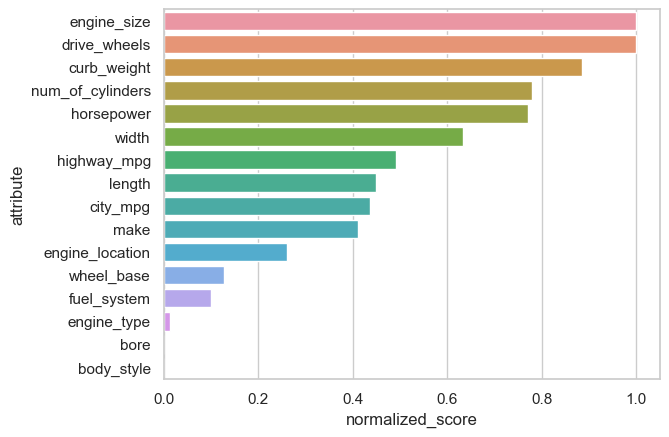

In [1280]:
sb.barplot(data=feature_df, x='normalized_score',y=feature_df['attribute'])

In [1281]:
cars_raw.corr()['price']

symboling           -0.082391
normalized_losses    0.133999
wheel_base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb_weight          0.834415
engine_size          0.872335
bore                 0.543155
stroke               0.082269
compression_ratio    0.071107
peak_rpm            -0.101616
city_mpg            -0.686571
highway_mpg         -0.704692
price                1.000000
Name: price, dtype: float64

<AxesSubplot:>

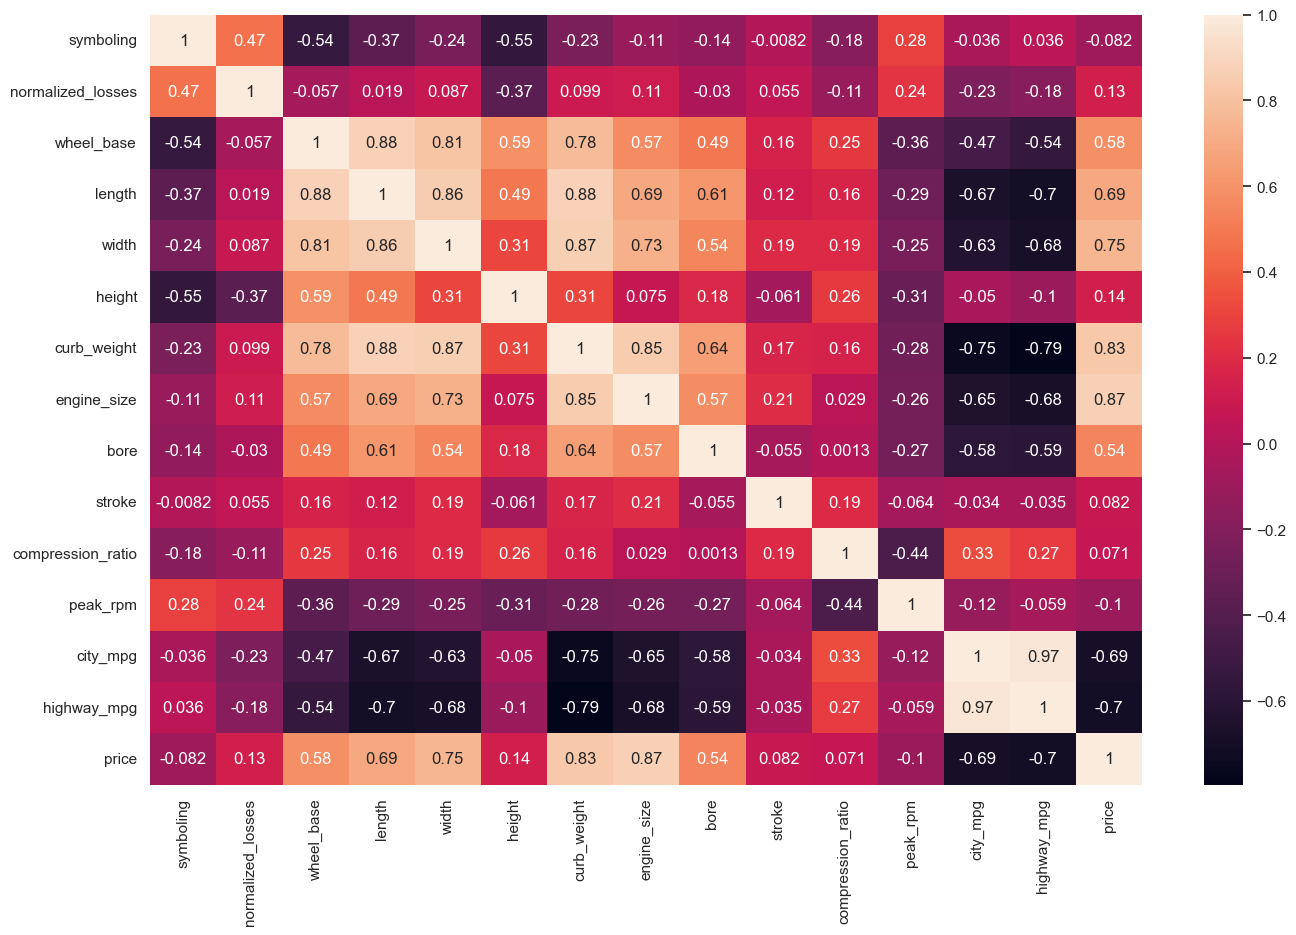

In [1283]:
#heat map for results of corr() function on all data
fig, ax = plt.subplots(figsize=(16,10))
sb.heatmap(cars_raw.corr(), annot=True)